## NetworkX object from protein atoms coordinates <a class="anchor" id="refs"></a>

In [1]:
from Bio.PDB import *
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pdbl_1 = PDBList()
pdbl_1.retrieve_pdb_file('3I40')

parser_1 = MMCIFParser()

structure_1 = parser_1.get_structure('3I40', 'i4/3i40.cif')


Structure exists: '/workspace/hodgelaplacians/examples/i4/3i40.cif' 


In [2]:
import nglview as nv

view_1 = nv.show_biopython(structure_1)
view_1.clear_representations()
#view as ball and stick (atom and bond)
view_1.add_ball_and_stick()

view_1

NGLWidget()

In [3]:
points_1 = []

for model in structure_1:
    for chain in model:
        for residue in chain:
            for atom in residue:
                points_1.append(tuple(atom.coord))
                
points_1 = np.array(points_1)

print(f"There are {len(points_1)} atoms in the protein 1.")

There are 438 atoms in the protein 1.


In [4]:
import gudhi as gd

import time
start_time = time.time()

epsilon = 3 # Connect two points if distance is smaller than epsilon

skeleton_1  = gd.RipsComplex(points = points_1, max_edge_length=epsilon )
rips_simplex_tree_1 = skeleton_1.create_simplex_tree(max_dimension=3) 
rips_skeleton_gudhi_1 = rips_simplex_tree_1.get_skeleton(1)

end_time = time.time()

print(f"Simplex tree constructed in {end_time-start_time} seconds")

Simplex tree constructed in 0.008245229721069336 seconds


In [5]:
import sys
sys.path.insert(0, "../")
from hodgelaplacians import HodgeLaplacians

start = time.time()

hl_1 = HodgeLaplacians(rips_skeleton_gudhi_1, maxdimension=1, mode='gudhi')

#print(hl_1.face_set)
#print(hl_1.n_faces(1))


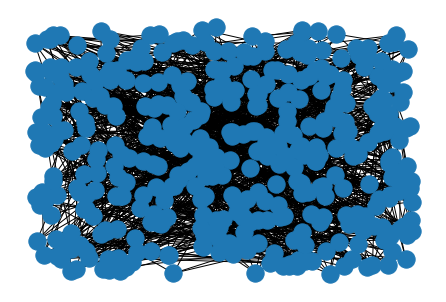

In [9]:
import networkx as nx

G = nx.Graph()

edges = hl_1.n_faces(1)

G.add_edges_from(edges)

nx.draw_random(G)


## References <a class="anchor" id="refs"></a> [↑](#toc)

1. 